In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
%matplotlib inline

In [16]:
stock = quandl.get('WIKI/PG',start_date='1997-10-27',end_date='2018-03-09')

In [17]:
stock.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-05,79.28,80.3939,79.15,80.29,8177044.0,0.0,1.0,79.28,80.3939,79.15,80.29,8177044.0
2018-03-06,80.41,80.4200,79.37,80.02,9084134.0,0.0,1.0,80.41,80.4200,79.37,80.02,9084134.0
2018-03-07,79.53,79.6400,78.90,79.16,9089498.0,0.0,1.0,79.53,79.6400,78.90,79.16,9089498.0
2018-03-08,79.17,79.9900,79.02,79.97,7423716.0,0.0,1.0,79.17,79.9900,79.02,79.97,7423716.0
2018-03-09,80.18,80.7450,79.90,80.29,6973003.0,0.0,1.0,80.18,80.7450,79.90,80.29,6973003.0


In [19]:
stock.to_csv("PG_data")

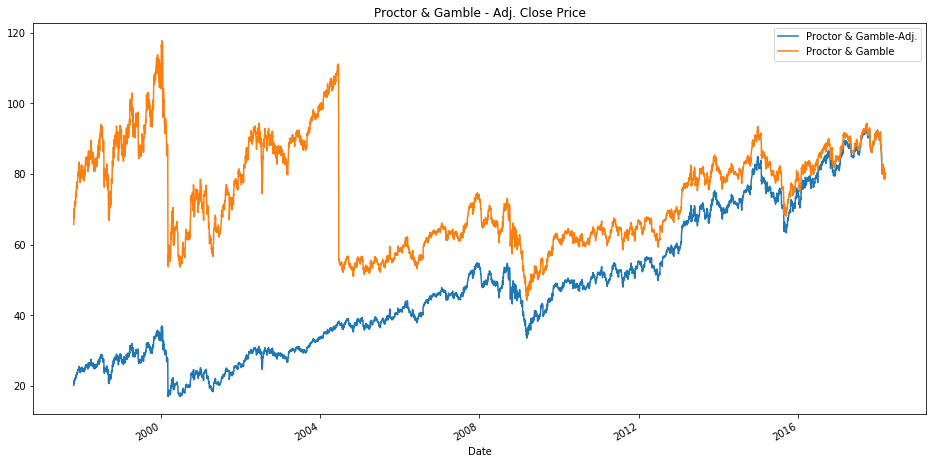

In [20]:
stock['Adj. Close'].plot(label='Proctor & Gamble-Adj.',figsize=(16,8),title='Proctor & Gamble - Adj. Close Price')
stock['Close'].plot(label='Proctor & Gamble',figsize=(16,8))
plt.legend();

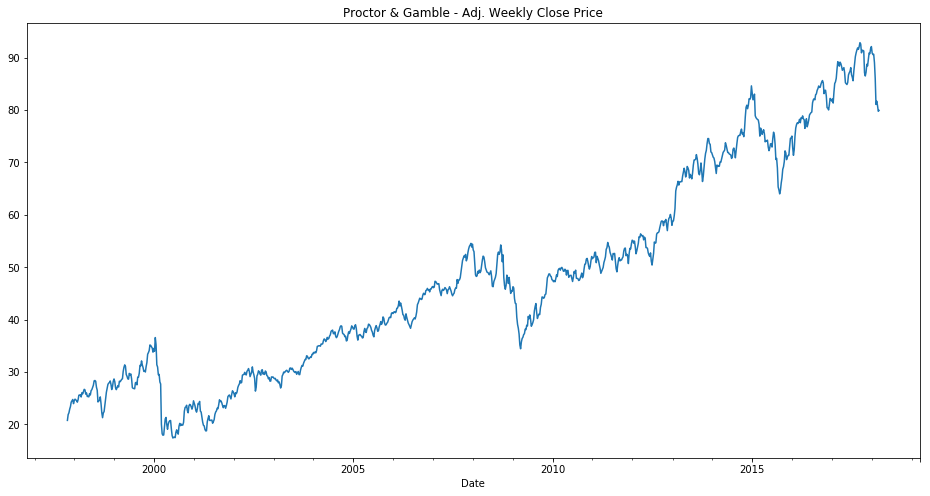

In [21]:
stock['Adj. Close'].resample('W').mean().plot(label='Proctor & Gamble-Adj.',figsize=(16,8),title='Proctor & Gamble - Adj. Weekly Close Price');

In [22]:
stock = pd.read_csv("PG_data")

In [23]:
stock.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
5119,2018-03-05,79.28,80.3939,79.15,80.29,8177044.0,0.0,1.0,79.28,80.3939,79.15,80.29,8177044.0
5120,2018-03-06,80.41,80.4200,79.37,80.02,9084134.0,0.0,1.0,80.41,80.4200,79.37,80.02,9084134.0
5121,2018-03-07,79.53,79.6400,78.90,79.16,9089498.0,0.0,1.0,79.53,79.6400,78.90,79.16,9089498.0
5122,2018-03-08,79.17,79.9900,79.02,79.97,7423716.0,0.0,1.0,79.17,79.9900,79.02,79.97,7423716.0
5123,2018-03-09,80.18,80.7450,79.90,80.29,6973003.0,0.0,1.0,80.18,80.7450,79.90,80.29,6973003.0


In [25]:
stock['Date'] = pd.to_datetime(stock['Date'])

In [26]:
stock.set_index('Date', inplace=True)

In [27]:
def take_first(array_like):
    return array_like[0]

def take_last(array_like):
    return array_like[-1]

stock_weekly = stock.resample('W',                                 # Weekly resample
                    how={'Adj. Open': take_first, 
                         'Adj. High': 'max',
                         'Adj. Low': 'min',
                         'Adj. Close': take_last,
                         'Adj. Volume': 'sum'}, 
                    loffset=pd.offsets.timedelta(days=-6)) # to put the labels to Monday

stock_weekly = stock_weekly[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

C:\Users\gdeni\Anaconda2\envs\pyfinance\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  del sys.path[0]


In [28]:
stock_weekly.tail()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2018-02-05,83.99,84.370,78.59,79.92,81847182.0
2018-02-12,80.61,83.250,80.27,82.60,48341218.0
2018-02-19,82.19,82.220,80.17,81.05,35890187.0
2018-02-26,81.45,82.000,77.90,79.50,56737750.0
2018-03-05,79.28,80.745,78.90,80.29,40747395.0


In [29]:
len(stock_weekly)

1063

In [30]:
stock_weekly[8:64]

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
1997-12-22,24.467607,24.908024,23.702994,23.742754,9115600.0
1997-12-29,23.990489,24.755102,23.914028,24.755102,10399400.0
1998-01-05,24.831563,25.327032,23.855917,24.125061,20607400.0
1998-01-12,23.742754,25.271980,23.721345,24.256574,20931000.0
1998-01-19,24.562419,25.099339,24.007130,24.047014,14327600.0
1998-01-26,24.083830,24.945939,23.718738,24.047014,24548000.0
1998-02-02,24.295522,25.292624,24.142122,25.157631,18980000.0
1998-02-09,25.139223,26.001333,24.869239,25.982924,18526000.0
1998-02-16,26.001333,26.001333,25.234332,25.581016,13399000.0


In [31]:
list = np.arange(-2, 54)
len(list)

56

In [32]:
stock_weekly_1998 = pd.DataFrame(stock_weekly[8:64]).set_index(np.arange(-2, 54))
stock_weekly_1999 = pd.DataFrame(stock_weekly[60:116])

In [33]:
stock_weekly_1998 = pd.DataFrame(stock_weekly[8:64]).set_index(np.arange(-2, 54))
stock_weekly_1999 = pd.DataFrame(stock_weekly[60:116]).set_index(np.arange(-2, 54))
stock_weekly_2000 = pd.DataFrame(stock_weekly[112:168]).set_index(np.arange(-2, 54))
stock_weekly_2001 = pd.DataFrame(stock_weekly[164:220]).set_index(np.arange(-2, 54))
stock_weekly_2002 = pd.DataFrame(stock_weekly[216:272]).set_index(np.arange(-2, 54))
stock_weekly_2003 = pd.DataFrame(stock_weekly[268:324]).set_index(np.arange(-2, 54))
stock_weekly_2004 = pd.DataFrame(stock_weekly[320:376]).set_index(np.arange(-2, 54))
stock_weekly_2005 = pd.DataFrame(stock_weekly[372:428]).set_index(np.arange(-2, 54))
stock_weekly_2006 = pd.DataFrame(stock_weekly[424:480]).set_index(np.arange(-2, 54))
stock_weekly_2007 = pd.DataFrame(stock_weekly[476:532]).set_index(np.arange(-2, 54))
stock_weekly_2008 = pd.DataFrame(stock_weekly[528:584]).set_index(np.arange(-2, 54))
stock_weekly_2009 = pd.DataFrame(stock_weekly[580:636]).set_index(np.arange(-2, 54))
stock_weekly_2010 = pd.DataFrame(stock_weekly[632:688]).set_index(np.arange(-2, 54))
stock_weekly_2011 = pd.DataFrame(stock_weekly[684:740]).set_index(np.arange(-2, 54))
stock_weekly_2012 = pd.DataFrame(stock_weekly[736:792]).set_index(np.arange(-2, 54))
stock_weekly_2013 = pd.DataFrame(stock_weekly[788:844]).set_index(np.arange(-2, 54))
stock_weekly_2014 = pd.DataFrame(stock_weekly[840:896]).set_index(np.arange(-2, 54))
stock_weekly_2015 = pd.DataFrame(stock_weekly[892:948]).set_index(np.arange(-2, 54))
stock_weekly_2016 = pd.DataFrame(stock_weekly[944:1000]).set_index(np.arange(-2, 54))
stock_weekly_2017 = pd.DataFrame(stock_weekly[996:1052]).set_index(np.arange(-2, 54))

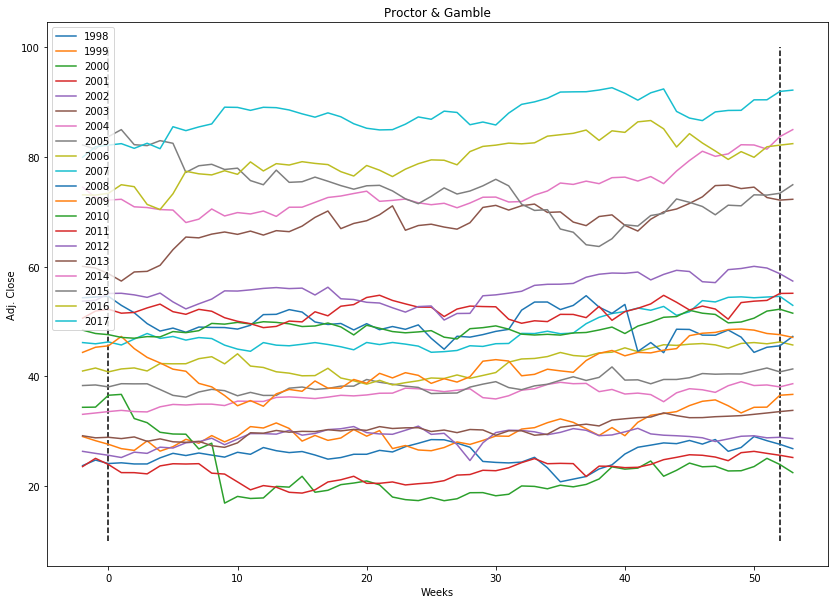

In [46]:
stock_weekly_1998['Adj. Close'].plot(figsize=(14,10),title='Proctor & Gamble',label='1998')
stock_weekly_1999['Adj. Close'].plot(label='1999')
stock_weekly_2000['Adj. Close'].plot(label='2000')
stock_weekly_2001['Adj. Close'].plot(label='2001')
stock_weekly_2002['Adj. Close'].plot(label='2002')
stock_weekly_2003['Adj. Close'].plot(label='2003')
stock_weekly_2004['Adj. Close'].plot(label='2004')
stock_weekly_2005['Adj. Close'].plot(label='2005')
stock_weekly_2006['Adj. Close'].plot(label='2006')
stock_weekly_2007['Adj. Close'].plot(label='2007')
stock_weekly_2008['Adj. Close'].plot(label='2008')
stock_weekly_2009['Adj. Close'].plot(label='2009')
stock_weekly_2010['Adj. Close'].plot(label='2010')
stock_weekly_2011['Adj. Close'].plot(label='2011')
stock_weekly_2012['Adj. Close'].plot(label='2012')
stock_weekly_2013['Adj. Close'].plot(label='2013')
stock_weekly_2014['Adj. Close'].plot(label='2014')
stock_weekly_2015['Adj. Close'].plot(label='2015')
stock_weekly_2016['Adj. Close'].plot(label='2016')
stock_weekly_2017['Adj. Close'].plot(label='2017')
plt.xlabel("Weeks")
plt.ylabel("Adj. Close")
#plt.vlines(x='0', ymin=stock_weekly['Adj. Close'].min(), ymax=stock_weekly['Adj. Close'].max(), color='r')
plt.vlines([0,52], 10,100, linestyles='dashed')
#plt.annotate('average',(-0.4,23.5))
plt.legend();

In [36]:
stock_weekly_1998.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
-2,24.467607,24.908024,23.702994,23.742754,9115600.0
-1,23.990489,24.755102,23.914028,24.755102,10399400.0
0,24.831563,25.327032,23.855917,24.125061,20607400.0
1,23.742754,25.271980,23.721345,24.256574,20931000.0
2,24.562419,25.099339,24.007130,24.047014,14327600.0


In [37]:
len(stock_weekly_2004)

56

In [38]:
stock_weekly_1998_norm = stock_weekly_1998.apply(lambda x: x/x.max(), axis=0)
stock_weekly_1999_norm = stock_weekly_1999.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2000_norm = stock_weekly_2000.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2001_norm = stock_weekly_2001.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2002_norm = stock_weekly_2002.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2003_norm = stock_weekly_2003.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2004_norm = stock_weekly_2004.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2005_norm = stock_weekly_2005.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2006_norm = stock_weekly_2006.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2007_norm = stock_weekly_2007.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2008_norm = stock_weekly_2008.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2009_norm = stock_weekly_2009.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2010_norm = stock_weekly_2010.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2011_norm = stock_weekly_2011.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2012_norm = stock_weekly_2012.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2013_norm = stock_weekly_2013.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2014_norm = stock_weekly_2014.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2015_norm = stock_weekly_2015.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2016_norm = stock_weekly_2016.apply(lambda x: x/x.max(), axis=0)
stock_weekly_2017_norm = stock_weekly_2017.apply(lambda x: x/x.max(), axis=0)

In [39]:
stock_weekly_1998_norm.tail()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
49,0.893973,0.946630,0.922041,0.931307,0.448706
50,0.928640,1.000000,0.960689,1.000000,0.330118
51,1.000000,0.998734,1.000000,0.973973,0.193125
52,0.960000,0.980909,0.961352,0.951360,0.461930
53,0.931307,0.938087,0.924801,0.924053,0.616833


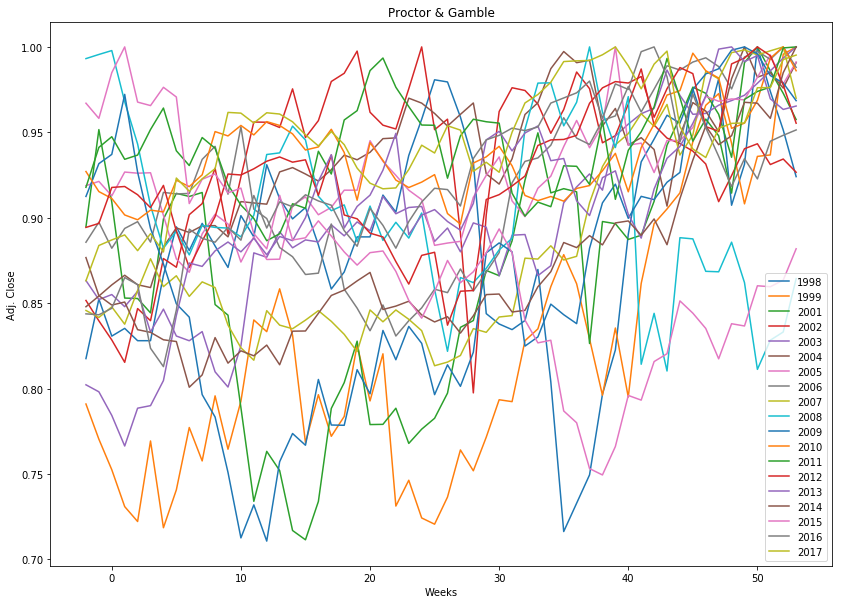

In [47]:
stock_weekly_1998_norm['Adj. Close'].plot(figsize=(14,10),title='Proctor & Gamble',label='1998')
stock_weekly_1999_norm['Adj. Close'].plot(label='1999')
#stock_weekly_2000_norm['Adj. Close'].plot(label='2000')
stock_weekly_2001_norm['Adj. Close'].plot(label='2001')
stock_weekly_2002_norm['Adj. Close'].plot(label='2002')
stock_weekly_2003_norm['Adj. Close'].plot(label='2003')
stock_weekly_2004_norm['Adj. Close'].plot(label='2004')
stock_weekly_2005_norm['Adj. Close'].plot(label='2005')
stock_weekly_2006_norm['Adj. Close'].plot(label='2006')
stock_weekly_2007_norm['Adj. Close'].plot(label='2007')
stock_weekly_2008_norm['Adj. Close'].plot(label='2008')
stock_weekly_2009_norm['Adj. Close'].plot(label='2009')
stock_weekly_2010_norm['Adj. Close'].plot(label='2010')
stock_weekly_2011_norm['Adj. Close'].plot(label='2011')
stock_weekly_2012_norm['Adj. Close'].plot(label='2012')
stock_weekly_2013_norm['Adj. Close'].plot(label='2013')
stock_weekly_2014_norm['Adj. Close'].plot(label='2014')
stock_weekly_2015_norm['Adj. Close'].plot(label='2015')
stock_weekly_2016_norm['Adj. Close'].plot(label='2016')
stock_weekly_2017_norm['Adj. Close'].plot(label='2017')
plt.xlabel("Weeks")
plt.ylabel("Adj. Close")
#plt.vlines(x='0', ymin=stock_weekly['Adj. Close'].min(), ymax=stock_weekly['Adj. Close'].max(), color='r')
#plt.vlines([0,52], 0.7,1.0, linestyles='dashed')
#plt.annotate('average',(-0.4,23.5))
plt.legend();

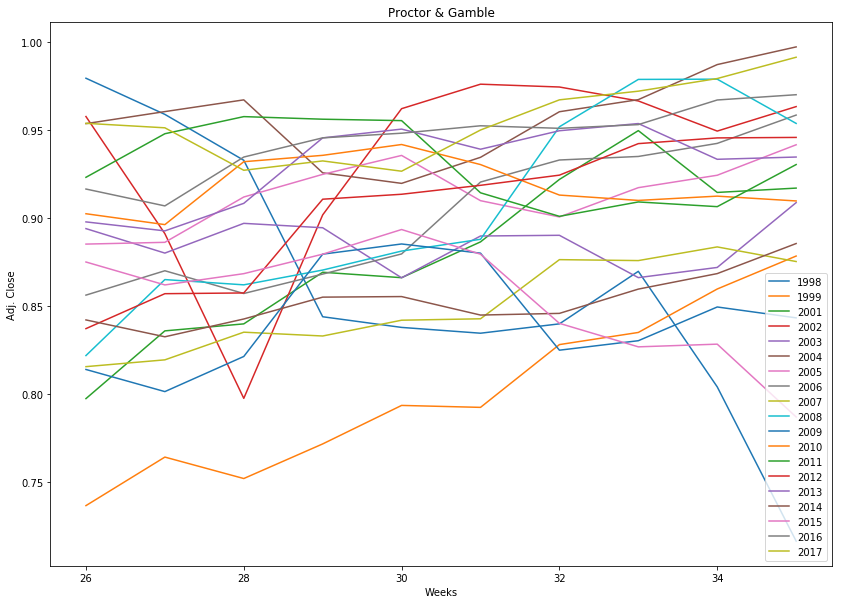

In [48]:
stock_weekly_1998_norm['Adj. Close'][28:38].plot(figsize=(14,10),title='Proctor & Gamble',label='1998')
stock_weekly_1999_norm['Adj. Close'][28:38].plot(label='1999')
#stock_weekly_2000_norm['Adj. Close'][28:38].plot(label='2000')
stock_weekly_2001_norm['Adj. Close'][28:38].plot(label='2001')
stock_weekly_2002_norm['Adj. Close'][28:38].plot(label='2002')
stock_weekly_2003_norm['Adj. Close'][28:38].plot(label='2003')
stock_weekly_2004_norm['Adj. Close'][28:38].plot(label='2004')
stock_weekly_2005_norm['Adj. Close'][28:38].plot(label='2005')
stock_weekly_2006_norm['Adj. Close'][28:38].plot(label='2006')
stock_weekly_2007_norm['Adj. Close'][28:38].plot(label='2007')
stock_weekly_2008_norm['Adj. Close'][28:38].plot(label='2008')
stock_weekly_2009_norm['Adj. Close'][28:38].plot(label='2009')
stock_weekly_2010_norm['Adj. Close'][28:38].plot(label='2010')
stock_weekly_2011_norm['Adj. Close'][28:38].plot(label='2011')
stock_weekly_2012_norm['Adj. Close'][28:38].plot(label='2012')
stock_weekly_2013_norm['Adj. Close'][28:38].plot(label='2013')
stock_weekly_2014_norm['Adj. Close'][28:38].plot(label='2014')
stock_weekly_2015_norm['Adj. Close'][28:38].plot(label='2015')
stock_weekly_2016_norm['Adj. Close'][28:38].plot(label='2016')
stock_weekly_2017_norm['Adj. Close'][28:38].plot(label='2017')
plt.xlabel("Weeks")
plt.ylabel("Adj. Close")
#plt.vlines(x='0', ymin=stock_weekly['Adj. Close'].min(), ymax=stock_weekly['Adj. Close'].max(), color='r')
#plt.vlines([0,52], 0.4,1.0, linestyles='dashed')
#plt.annotate('average',(-0.4,23.5))
plt.legend();